In [47]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
import pmdarima
from pmdarima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
from composition_stats import closure

In [ ]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [48]:
SLR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR2_data.csv"))

In [49]:
SLR_data['Year'] = pd.to_datetime(SLR_data['Year'])
SLR_data =SLR_data.set_index("Year")

In [50]:
test_data= pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\df_test.csv"))
test_data['Year'] = pd.to_datetime(test_data['Year'])
test_data = test_data.set_index("Year")

In [51]:
SLR_1=SLR_data['log_ratio_1']
SLR_2=SLR_data['log_ratio_2']


In [52]:
def calculate_rmse_for_cv(train_data, test_data, a, b, c):
    arima_model = ARIMA(train_data, order=(a, b, c)).fit()
    prediction = arima_model.predict(
        start=len(train_data), end=len(train_data)+len(test_data)-1)
    rmse = sqrt(mean_squared_error(test_data, prediction))
    return rmse, test_data, prediction

For SLR_1

In [53]:
auto_arima(SLR_1, start_p=0, d=2 ,start_q=0,
           max_p=10, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-389.623, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-388.645, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-389.163, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-391.183, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-387.090, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.279 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [54]:
train_e_1, test_e_1 = train_test_split(SLR_1, test_size=0.2, shuffle=False)
train_e_2, test_e_2 = train_test_split(train_e_1, test_size=0.2, shuffle=False)
train_e_3, test_e_3 = train_test_split(train_e_2, test_size=0.2, shuffle=False)
rmse_e_1, test_data_e_1, prediction_test_e_1=calculate_rmse_for_cv(train_e_1, test_e_1,0,2,0)
rmse_e_2, test_data_e_2, prediction_test_e_2=calculate_rmse_for_cv(train_e_2, test_e_2,0,2,0)
rmse_e_3, test_data_e_3, prediction_test_e_3=calculate_rmse_for_cv(train_e_3, test_e_3,0,2,0)
average_rmse_e=(rmse_e_1+rmse_e_2+rmse_e_3)/3
average_rmse_e

0.019191633226856755

In [55]:
arima_model_e = ARIMA(SLR_1, order=(0, 2, 0)).fit()
prediction_1 = arima_model_e.predict(
    start=len(SLR_1), end=len(SLR_1)+len(test_data)-1)
prediction_1 = prediction_1.to_frame()
prediction_1.rename(columns = {'predicted_mean':0}, inplace = True)
final_1 = pd.concat([SLR_1, prediction_1])

For Transfomed_SLR_2

In [56]:
auto_arima(SLR_2, start_p=0, d=2 ,start_q=0,
           max_p=10, max_d=2, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-404.556, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-407.691, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-407.870, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-404.815, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-406.135, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-406.045, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-403.216, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-408.542, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-406.945, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-406.706, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-408.489, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-403.865, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.745 seconds


ARIMA(order=(0, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [57]:
train_y_1, test_y_1 = train_test_split(SLR_2, test_size=0.2, shuffle=False)
train_y_2, test_y_2 = train_test_split(train_y_1, test_size=0.2, shuffle=False)
train_y_3, test_y_3 = train_test_split(train_y_2, test_size=0.2, shuffle=False)
rmse_y_1, test_data_y_1, prediction_test_y_1=calculate_rmse_for_cv(train_y_1, test_y_1, 0, 2, 1)
rmse_y_2, test_data_y_2, prediction_test_y_2=calculate_rmse_for_cv(train_y_2, test_y_2, 0, 2, 1)
rmse_y_3, test_data_y_3, prediction_test_y_3=calculate_rmse_for_cv(train_y_3, test_y_3, 0, 2, 1)
 
average_rmse_y=(rmse_y_1+rmse_y_2+rmse_y_3)/3
average_rmse_y

0.018605058811463782

In [58]:
arima_model_y = ARIMA(SLR_2, order=(0, 2, 1)).fit()
prediction_2 = arima_model_y.predict(
    start=len(SLR_2), end=len(SLR_2)+len(test_data)-1)
prediction_2 = prediction_2.to_frame()
prediction_2.rename(columns = {'predicted_mean':0}, inplace = True)
final_2 = pd.concat([SLR_2, prediction_2])

Combine part

In [59]:
final_1.rename(columns = {0:'log_ratio_1'}, inplace = True)
final_2.rename(columns = {0:'log_ratio_2'}, inplace = True)

In [60]:
def SLR_inv(df1,df2):
    arr_1 = df1.to_numpy()
    arr_2 = df2.to_numpy()
    log_ratio_1 = pd.DataFrame(arr_1,columns=['log_ratio_1'])
    log_ratio_2 = pd.DataFrame(arr_2,columns=['log_ratio_2'])
    e2_arr=[]
    y2_arr=[]
    k2_arr=[]
    for i in range(len(df1)):
        A = log_ratio_1._get_value(i,0,takeable = True)
        B = log_ratio_2._get_value(i,0,takeable = True)
        e2_arr.append(1)
        y2_arr.append(1/(10**A))
        k2_arr.append(1/(10**B))
    e_prepro = pd.DataFrame(e2_arr, columns=['e_prepro'])
    y_prepro = pd.DataFrame(y2_arr, columns=['y_prepro'])
    k_prepro = pd.DataFrame(k2_arr, columns=['k_prepro'])
    prepro = pd.concat([e_prepro, y_prepro,k_prepro],axis=1)
    data_proportion = closure(prepro)
    return data_proportion



In [61]:
data_proportion=SLR_inv(final_1,final_2)

In [62]:
def set_col(df):
    df = pd.DataFrame(df, columns=[
    'elder', 'youth', 'kid'])
    df['Year'] = df.index + 1964
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    return df

In [63]:
proportion = set_col(data_proportion)

In [64]:
df_actual=proportion[(proportion.index< '2010-01-01')]
df_forecast=proportion[(proportion.index> '2009-01-01')]

In [65]:
proportion_actual_1=SLR_inv(test_data_e_1, test_data_y_1)
proportion_actual_2=SLR_inv(test_data_e_2, test_data_y_2)
proportion_actual_3=SLR_inv(test_data_e_3, test_data_y_3)
proportion_forecast_1=SLR_inv(prediction_test_e_1, prediction_test_y_1)
proportion_forecast_2=SLR_inv(prediction_test_e_2, prediction_test_y_2)
proportion_forecast_3=SLR_inv(prediction_test_e_3, prediction_test_y_3)

In [66]:
rmse1 = sqrt(mean_squared_error(proportion_actual_1, proportion_forecast_1))
rmse2 = sqrt(mean_squared_error(proportion_actual_2, proportion_forecast_2))
rmse3 = sqrt(mean_squared_error(proportion_actual_3, proportion_forecast_3))

rmse_cv=(rmse1+rmse2+rmse3)/3
rmse_cv

0.0024991151891256124

In [67]:
rmse_final = sqrt(mean_squared_error(df_forecast, test_data))
rmse_final

0.007732636596317151

In [68]:
df_forecast.to_csv(relative_path+"\\age_structure_data\\auto_SLR2_forecast.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

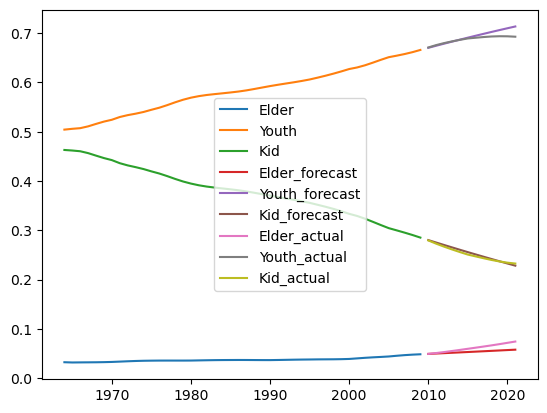

In [69]:
plt.plot(df_actual['elder'],label="Elder")
plt.plot(df_actual['youth'],label="Youth")
plt.plot(df_actual['kid'],label="Kid")
plt.plot(df_forecast['elder'],label="Elder_forecast")
plt.plot(df_forecast['youth'],label="Youth_forecast")
plt.plot(df_forecast['kid'],label="Kid_forecast")
plt.plot(test_data['elder'],label="Elder_actual")
plt.plot(test_data['youth'],label="Youth_actual")
plt.plot(test_data['kid'],label="Kid_actual")



plt.legend(loc='best')
plt.show